# EWX Timeshift

In [5]:
%matplotlib notebook
import os
import pandas as pd
import EWX_forecast as ewx

basepath = os.getcwd()
os.chdir(basepath)
json_files = os.path.join(basepath, 'json')
csv_files = os.path.join(basepath, 'csv')
#IDR = '/home/jupyter-engiela/la-tools-test/IDR_Drop/IDR'

print('working in {}'.format(basepath))

working in C:\Users\wb5888\la-tools-test\EWX_Forecast


In [6]:
files = ewx.sortdir(csv_files, 10)

files found in dir:  C:\Users\wb5888\la-tools-test\EWX_Forecast\csv
                                               files                time
0                        NEPOOL_BECO_28773420014.csv 2020-01-02 15:21:04
1  20191205085101028000_NEPOOL_WMECO_54434498077_... 2019-12-11 07:20:03
2                             WMECO_adj_forecast.csv 2019-12-11 07:20:03
3             0021483009_MECO_IDR_vert_timeshift.csv 2019-09-03 08:29:38
4                   0021483009_MECO_IDR_vert_val.csv 2019-09-03 08:29:38
5             0021638013_MECO_IDR_vert_timeshift.csv 2019-09-03 08:29:38
6                   0021638013_MECO_IDR_vert_val.csv 2019-09-03 08:29:38
7             0040677012_MECO_IDR_vert_timeshift.csv 2019-09-03 08:29:38
8                   0040677012_MECO_IDR_vert_val.csv 2019-09-03 08:29:38
9             0043496028_MECO_IDR_vert_timeshift.csv 2019-09-03 08:29:38


In [ ]:
# choose files as list
# files.files[[0]]
# files.files[:2] 

In [7]:
myfiles = files.files[[0]]
myfiles

0    NEPOOL_BECO_28773420014.csv
Name: files, dtype: object

### Inputs
- file (f)
- years to shift
- read directory
- write directory

In [8]:
for f in myfiles:
    ch3 = ewx.forecast_main(f, 10, csv_files, csv_files)

parsing data files...
using filename NEPOOL_BECO_28773420014.csv.
                  Time  NEPOOL_BECO_28773420014,101
0  2016-04-19 00:00:00                    26.534501
1  2016-04-19 01:00:00                    27.762002
2  2016-04-19 02:00:00                    25.377501
3  2016-04-19 03:00:00                    26.597501
4  2016-04-19 04:00:00                    28.268502
read NEPOOL_BECO_28773420014.csv from C:\Users\wb5888\la-tools-test\EWX_Forecast\csv.
running data validations...
...
...
...
...
...
usage validated.
running usage estimation flags...


C:\Users\wb5888\la-tools-test\EWX_Forecast\EWX_forecast.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp2.lin[tmp2.lin.isnull()] = tmp2.v[tmp2.lin.isnull()]


writing validated usage file to .csv...
wrote NEPOOL_BECO_28773420014.csv to C:\Users\wb5888\la-tools-test\EWX_Forecast\csv.
forecasting...
forecasted year 0 of 10 with 8736 reads.


C:\Users\wb5888\la-tools-test\EWX_Forecast\EWX_forecast.py:469: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  master = pd.concat([year_data, future], axis = 0)
C:\Users\wb5888\la-tools-test\EWX_Forecast\EWX_forecast.py:481: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  master = pd.concat([master, forecast], axis = 0)


forecasted year 1 of 10 with 8736 reads.
forecasted year 2 of 10 with 8736 reads.
forecasted year 3 of 10 with 8736 reads.
forecasted year 4 of 10 with 8736 reads.
forecasted year 5 of 10 with 8736 reads.
forecasted year 6 of 10 with 8736 reads.
forecasted year 7 of 10 with 8736 reads.
forecasted year 8 of 10 with 8736 reads.
forecasted year 9 of 10 with 8736 reads.
forecasted year 10 of 10 with 8736 reads.
writing forecasts to .csv...
wrote NEPOOL_BECO_28773420014_timeshift.csv to C:\Users\wb5888\la-tools-test\EWX_Forecast\csv.


## Plot

<IPython.core.display.Javascript object>


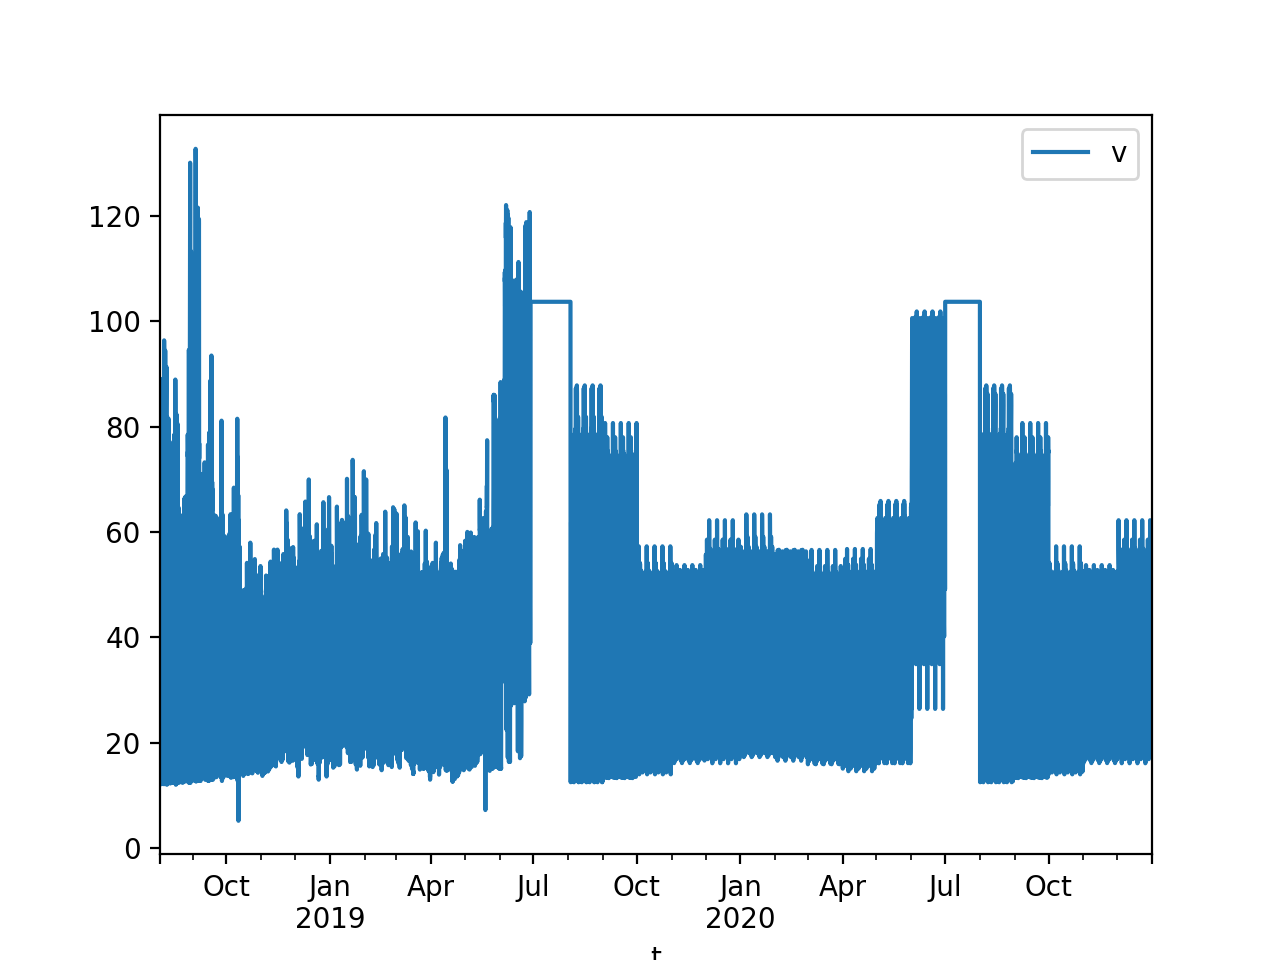

In [5]:
ch3[ch3.index.year < 2021].plot(y = 'v')